In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.svm import SVC


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.2 | Loading and reading the data</b></p>
</div>
<h4 style="line-height:30px">This is dataset which is used to recommend the crop for the suitable soil. This will be very useful in crop production (Agriculture) without looses based on soli ph, rainfall, humadity and other chemical components present in the soil. </h4>

In [61]:
df = pd.read_csv('Crop_recommendation.csv')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.3 | About the data</b></p>
</div>
<ul>
    <li><h4 style="line-height:25px"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Nitrogen</b></mark> is so vital because it is a <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>major component of chlorophyll</b></mark>, the compound by which plants use sunlight energy to produce sugars from water and carbon dioxide (i.e., photosynthesis). It is also a major component of amino acids, the building blocks of proteins. Without proteins, plants wither and die.</h4></li>
    <hr>
    <li><h4 style="line-height:25px;"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Phosphorus</b></mark> is, therefore, important in <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>cell division and development of new tissue.</b></mark> Phosphorus is also associated with complex energy transformations in the plant. Adding phosphorus to soil low in available phosphorus promotes root growth and winter hardiness, stimulates tillering, and often hastens maturity.</h4></li>
    <hr>
    <li><h4 style="line-height:25px"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Potassium</b></mark> is a critical nutrient that plants absorb from the soil, and from fertilizer. It <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>increases disease resistance</b></mark>, helps stalks to grow upright and sturdy, improves drought tolerance, and helps plants get through the winter.</h4></li>
    <hr>
    <li><h4 style="line-height:25px">The average <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>soil temperatures</b></mark> for bioactivity range from 50 to 75F. These values are favorable for normal life functions of earth biota that ensure proper organic matter decomposition, <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>increased nitrogen mineralization</b></mark>, uptake of soluble substances, and metabolism.</h4></li>
    <hr>
    <li><h4 style="line-height:25px">The pH range <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>5.5–6.5</b></mark> is optimal for plant growth as the availability of nutrients is optimal.</h4></li>
    <hr>
    <li><h4 style="line-height:25px">Besides disease, <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>rainfall</b></mark> can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>faster-growing plants</b></mark>, which can cut down on germination time and the length between seeding and harvest.</h4></li>
    <hr>
</ul>

In [62]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [63]:
print("Shape of the dataframe: ",df.shape)
df.isna().sum()

Shape of the dataframe:  (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [65]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [66]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2 | Categorical plot </b></p>
</div>


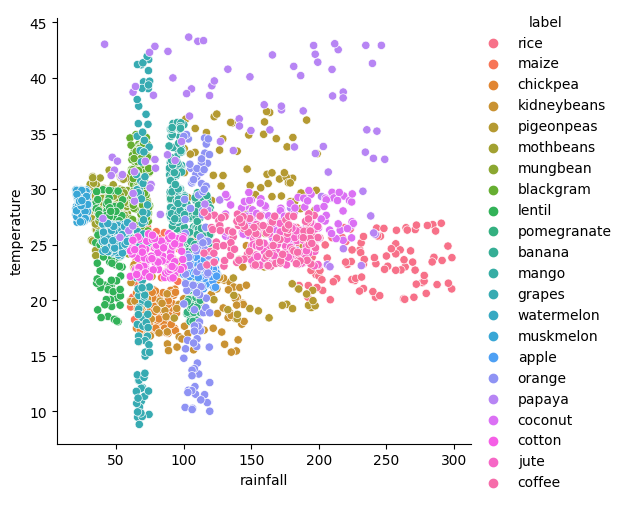

In [67]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:white;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;
              color:black;
              text-align:center;"><b>These graphs shows that thers is no outliers present in this dataset and it is confirmed with the help of Statistics(IQR)</b></p>
</div>

<h1><b>3 <span style='color:#00bd35;'>|</span> 🎯📊Prediction🍅🥭🍎🍐</b></h1>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.1 | Spliting the train and test data</b></p>
</div>


In [68]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [69]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [70]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.2 | Best model choosing</b></p>
</div>
<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#636363;
            font-size:120%;
            font-family:fantasy;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><i>3.2.1 <b>|</b> Decision Tree, Support vector mechanism, Random forest</i></p>
</div>

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
accuracy

0.9872727272727273

In [79]:
goods=df['label'].unique()
goods

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [81]:
predicted = classifier.predict(x_test)
pd.DataFrame(goods[predicted])

,0
0,maize
1,pomegranate
2,coffee
3,papaya
4,blackgram
...,...
545,coffee
546,kidneybeans
547,muskmelon
548,coconut
